In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

In [3]:
df

,molecule_chembl_id,canonical_smiles,standard_value,standard_value_norm,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,750.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,100.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,50000.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,300.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,800.0,6.096910
...,...,...,...,...,...
5038,CHEMBL4554172,Cc1ccc(-c2nc(NC(=O)C3CCN(Cc4cccc(F)c4)CC3)sc2-...,10000.0,10000.0,5.000000
5039,CHEMBL4533844,Cc1ccc(-c2nc(NC(=O)C3CCN(Cc4ccccc4C(F)(F)F)CC3...,7570.0,7570.0,5.120904
5040,CHEMBL4570655,Cc1ccc(-c2nc(NC(=O)C3CCN(Cc4ccccc4C)CC3)sc2-c2...,10000.0,10000.0,5.000000
5041,CHEMBL4571704,COc1cc(O)c2c(c1)C1=C(c3c(O)c(O)cc(C)c3-c3cc(OC...,15500.0,15500.0,4.809668


# Canonical_smiles To secuence

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
max_len_idx = df['canonical_smiles'].apply(len).argmax()
min_len_idx = df['canonical_smiles'].apply(len).argmin()

In [6]:
X = df['canonical_smiles']
y = df['pIC50']

In [7]:
tk = Tokenizer(char_level=True, lower=False)
tk.fit_on_texts(X)
tk.word_index

{'c': 1,
 'C': 2,
 '(': 3,
 ')': 4,
 '1': 5,
 'O': 6,
 '2': 7,
 'N': 8,
 '=': 9,
 '3': 10,
 '[': 11,
 ']': 12,
 '@': 13,
 'n': 14,
 '4': 15,
 'H': 16,
 '-': 17,
 '/': 18,
 'l': 19,
 '.': 20,
 '+': 21,
 'F': 22,
 '5': 23,
 'o': 24,
 'B': 25,
 'r': 26,
 'S': 27,
 '\\': 28,
 '#': 29,
 '6': 30,
 's': 31,
 'I': 32,
 'e': 33,
 'P': 34,
 '7': 35,
 '8': 36,
 'i': 37,
 'a': 38}

In [8]:
X_seq = tk.texts_to_sequences(X)
X_seq_pad = pad_sequences(X_seq)

In [9]:
X_seq_pad[max_len_idx]

array([ 2, 11,  2, 13, 13, 12,  5,  7,  2,  2, 11,  2, 13, 16, 12, 10, 11,
        2, 13, 12, 15,  3,  2,  4,  2,  2,  2, 11,  2, 13, 13, 12, 23,  3,
        2,  4,  2,  3,  9,  6,  4,  6,  2,  2, 11,  8, 21, 12,  3,  2,  4,
        3,  2,  4,  2,  2,  2,  2,  2,  2,  2,  2,  2, 11,  8, 21, 12,  3,
        2,  4,  3,  2,  4,  2,  2,  6,  2,  3,  9,  6,  4, 11,  2, 13, 12,
       30,  3,  2,  4,  2,  2,  2, 11,  2, 13, 12, 35,  3,  2,  4, 11,  2,
       13, 13, 16, 12, 30,  2,  2, 11,  2, 13, 13, 12, 30, 36,  2, 11,  2,
       13, 13, 16, 12,  3,  6,  2,  3,  9,  6,  4,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  9,  6,  4,  6, 11,  2, 13, 13, 16, 12,  5,  2, 11,
        2, 13, 13, 12, 10,  3,  2,  2, 11,  2, 13, 13, 16, 12, 15, 23,  4,
        2,  7,  4, 11,  2, 13, 13, 12,  3,  2,  4,  3,  2,  2, 11,  2, 13,
       13, 16, 12, 35, 30,  4,  2, 36, 20, 11, 25, 26, 17, 12, 20, 11, 25,
       26, 17, 12], dtype=int32)

In [10]:
X_seq_pad[min_len_idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 8, 2, 3, 9, 6, 4, 6], dtype=int32)

# Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_seq_pad, y, test_size=0.2, random_state=42)

In [13]:
len(X_train), len(y_train), len(X_test)

(4034, 4034, 1009)

# Data augmentation (Optional)

In [630]:
X_train = np.vstack([X_train, X_train[:, ::-1]])

In [631]:
X_train.shape

(8068, 207)

In [633]:
y_train = np.hstack([y_train, y_train])

In [634]:
y_train.shape

(8068,)

# Network Model

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout, Activation, BatchNormalization, Conv1D, MaxPool1D, GlobalAveragePooling1D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import backend as K
import tensorflow as tf

In [78]:
from tensorflow.keras import layers as L

def text_cnn(sequence_length, vocab_size, embedding_size, 
             filter_sizes, num_filters, embedding_matrix, drop_out=0.5 ,l2_reg_lambda=0.0):
    input_x = L.Input(shape=(sequence_length,), name='input_x')
    
    # embedding layer
    if embedding_matrix is None:
        embedding = L.Embedding(vocab_size, embedding_size, name='embedding')(input_x)
    else:
        embedding = L.Embedding(vocab_size, embedding_size, weights=[embedding_matrix], name='embedding')(input_x)
    expend_shape = [embedding.get_shape().as_list()[1], embedding.get_shape().as_list()[2], 1]
    # embedding_chars = K.expand_dims(embedding, -1)    # 4D tensor [batch_size, seq_len, embeding_size, 1] seems like a gray picture
    embedding_chars = L.Reshape(expend_shape)(embedding)
    
    # conv->max pool
    pooled_outputs = []
    for i, filter_size in enumerate(filter_sizes):
        conv = L.Conv2D(filters=num_filters, 
                        kernel_size=[filter_size, embedding_size],
                        strides=1,
                        padding='valid',
                        activation='relu',
                        kernel_initializer=tf.keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1),
                        bias_initializer=tf.keras.initializers.constant(value=0.1),
                        name=('conv_%d' % filter_size))(embedding_chars)
        # print("conv-%d: " % i, conv)
        max_pool = L.MaxPool2D(pool_size=[sequence_length - filter_size + 1, 1],
                               strides=(1, 1),
                               padding='valid',
                               name=('max_pool_%d' % filter_size))(conv)
        pooled_outputs.append(max_pool)
        # print("max_pool-%d: " % i, max_pool)
    
    # combine all the pooled features
    num_filters_total = num_filters * len(filter_sizes)
    h_pool = L.Concatenate(axis=3)(pooled_outputs)
    h_pool_flat = L.Reshape([num_filters_total])(h_pool)
    # add dropout
    dropout = L.Dropout(drop_out)(h_pool_flat)
    
    # output layer
    output = L.Dense(1,
                     kernel_initializer='glorot_normal',
                     bias_initializer=tf.keras.initializers.constant(0.1),
                     activation='linear',
                     name='output')(dropout)
    
    model = tf.keras.models.Model(inputs=input_x, outputs=output)
    
    return model

In [79]:
FILTER_SIZES = (3, 4, 5)
NUM_FILTERS = 128
max_sequence_len = X_seq_pad.shape[1]
vocab_size = len(tk.word_index)
embeddings_size = 128
model = text_cnn(max_sequence_len, vocab_size + 1, embeddings_size, FILTER_SIZES, NUM_FILTERS, None, drop_out=0, l2_reg_lambda=0)

In [80]:
# model.summary()

In [81]:
def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [82]:
# # num_filters = 128
# dropout_rate=0.1
# embeddings_size = 64
# model = Sequential()
# model.add(Embedding(vocab_size + 1, embeddings_size, input_length=max_sequence_len))
# model.add(Conv1D(embeddings_size * 2, 5, activation='linear', padding='valid'))
# # model.add(BatchNormalization())
# model.add(Activation('relu'))
# # model.add(Dropout(dropout_rate))
# model.add(MaxPool1D(pool_size=2, strides=2))
# model.add(Conv1D(embeddings_size * 4, 5, activation='linear', padding='valid'))
# # model.add(BatchNormalization())
# model.add(Activation('relu'))
# # model.add(Dropout(dropout_rate))
# model.add(MaxPool1D(pool_size=2, strides=2))
# model.add(Conv1D(num_filters * 6, 5, activation='linear', padding='valid'))
# # model.add(BatchNormalization())
# model.add(Activation('relu'))
# # model.add(Dropout(dropout_rate))
# model.add(MaxPool1D(pool_size=2, strides=2))
# model.add(GlobalAveragePooling1D())
# # model.add(Flatten())
# model.add(Dense(50, activation='linear'))
# # model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dense(1))

In [83]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_x (InputLayer)            [(None, 207)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 207, 128)     4992        input_x[0][0]                    
__________________________________________________________________________________________________
reshape_8 (Reshape)             (None, 207, 128, 1)  0           embedding[0][0]                  
__________________________________________________________________________________________________
conv_3 (Conv2D)                 (None, 205, 1, 128)  49280       reshape_8[0][0]                  
____________________________________________________________________________________________

In [88]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=[R2])

In [89]:
mcp = ModelCheckpoint('models/best_model_{epoch}', save_best_only=True, save_format="h5")

In [90]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test), callbacks=[])

Epoch 1/10
32/32 [==============================] - 4s 111ms/step - loss: 0.1978 - R2: 0.9286 - val_loss: 0.8974 - val_R2: 0.7011
Epoch 2/10
32/32 [==============================] - 4s 111ms/step - loss: 0.1889 - R2: 0.9316 - val_loss: 0.8933 - val_R2: 0.7024
Epoch 3/10
32/32 [==============================] - 4s 111ms/step - loss: 0.1857 - R2: 0.9346 - val_loss: 0.8950 - val_R2: 0.7017
Epoch 4/10
32/32 [==============================] - 4s 111ms/step - loss: 0.1858 - R2: 0.9325 - val_loss: 0.8938 - val_R2: 0.7021
Epoch 5/10
32/32 [==============================] - 4s 111ms/step - loss: 0.1852 - R2: 0.9339 - val_loss: 0.8959 - val_R2: 0.7012
Epoch 6/10
32/32 [==============================] - 4s 112ms/step - loss: 0.1825 - R2: 0.9333 - val_loss: 0.9043 - val_R2: 0.6983
Epoch 7/10
32/32 [==============================] - 4s 111ms/step - loss: 0.1833 - R2: 0.9342 - val_loss: 0.8961 - val_R2: 0.7012
Epoch 8/10
32/32 [==============================] - 4s 111ms/step - loss: 0.1814 - R2: 0.9

In [209]:
model.history

In [91]:
y_pred = model.predict(X_test)

# Score

In [92]:
r2 = 1 - ((y_test.values - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()

In [93]:
r2
# 0.4984533246797399

0.7024055842719378

In [94]:
model.save('models/embed_64_bi_text_cnn.h5')

# Load model (solo si se grabo el modelo)

In [214]:
from tensorflow.keras.models import load_model

In [215]:
# model_loaded = load_model('models/embed_64_bi_lstm_100_dense_50_bn.h5', custom_objects={'R2': R2})

In [216]:
y_pred = model_loaded.predict(X_test)

NameError: name 'model_loaded' is not defined

In [475]:
r2 = 1 - ((y_test.values - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
r2

0.6913848492905522

# Evaluación

<function matplotlib.pyplot.show(close=None, block=None)>

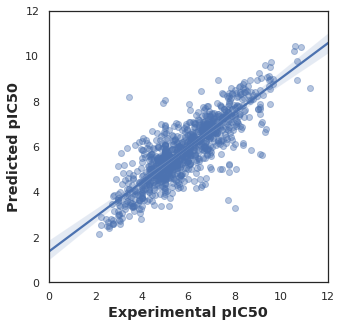

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

# TSNE

In [201]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [204]:
embedings = model.layers[1].get_weights()[0][1:]

In [205]:
embedings.shape

(38, 64)

In [206]:
tsne = TSNE(2)
X_2d = tsne.fit_transform(embedings)

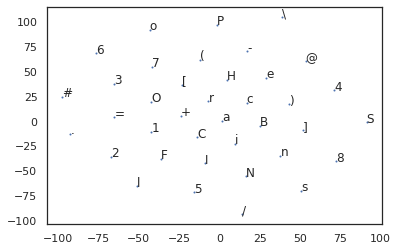

In [207]:
plt.scatter(X_2d[:, 0], X_2d[:, 1], s=1)
for i, t in enumerate(tk.word_index):
    plt.text(X_2d[i, 0], X_2d[i, 1], t)